# 6-2 文字分析
使用哈利波特第一集《神秘的魔法石》第一章（HarryPotterOne.txt）

In [1]:
# 載入常用套件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
# 下載中文NLP套件
# !pip install ckiptagger[tf,gdown]
# 下載ckiptagger所需的文件檔案用以做文字分析
# 套件會自動下載到 ./data.zip (2GB) 資料夾並且從中讀取所需檔案
# data_utils.download_data_gdown("./")

In [3]:
text = pd.read_csv('hw_data/hw6/HarryPotterOne.txt')
text.tail()

,第１章 大難不死的男孩
97,海格用外衣衣袖擦了擦流淚的眼睛，跨上摩托，踩著了發動機，隨著一聲吼叫，摩托車騰空而起，消...
98,「希望很快和您見面，麥教授。」鄧不利多朝麥教授點頭說。她擤了擤鼻子作為回答。
99,鄧不利多轉身來到街上。他在街角上掏出銀製熄燈器，咔噠彈了一下，只見十二個火球又回到各自的...
100,「祝你好運，哈利。」他喃喃地說道，接著跺腳跟一轉身，只聽斗篷颼的一聲，他已經消失得無影無蹤了。
101,微風拂動著水蠟樹街兩旁整潔的樹籬，街道在漆黑的天空下寂靜無聲，一塵不染，誰也不會想到這裡...


In [4]:
from ckiptagger import data_utils, construct_dictionary, WS, POS, NER
# 呼叫 NLP包
ws = WS("./data")
pos = POS("./data")
ner = NER("./data")

In [5]:
# 準備一個實體的List
NERlist = []

sentence_list = []

for s in text['第１章　大難不死的男孩']:
    sentence_list.append(s[2:])
    # print(s)
     
# 做斷詞
word_sentence_list = ws(sentence_list)

#### 查看部分斷詞完的結果

In [6]:
word_sentence_list[0][:10]

['家', '住', '水蠟樹街', '四號', '的', '德思禮', '夫婦', '總是', '得意', '地']

## POS & NER 分析
pos分辨實詞跟虛詞
ner辨識實體(名詞)

In [7]:
def print_word_pos_sentence(word_sentence, pos_sentence):
    assert len(word_sentence) == len(pos_sentence)
    for word, pos in zip(word_sentence, pos_sentence):
        print(f"{word}({pos})", end="\u3000") # \u3000代表空白格，print ()的結尾默認為新的一行’\n’，透過end參數設定可以有不一樣的呈現。
    print()
    return

In [8]:
# 做詞性標記(POS)
pos_sentence_list = pos(word_sentence_list)
# 做實體辨識(NER)
entity_sentence_list = ner(word_sentence_list, pos_sentence_list)

In [9]:
# 將三者組合後印出
for i, sentence in enumerate(sentence_list):
    print()
    print(f"'{sentence}'")
    print_word_pos_sentence(word_sentence_list[i],  pos_sentence_list[i])
    for entity in sorted(entity_sentence_list[i]):
        print(entity)


'家住水蠟樹街四號的德思禮夫婦總是得意地說他們是非常規矩的人家。拜託，拜託了。他們從來跟神秘古怪的事不沾邊，因為他們根本不相信那些邪門歪道。'
家(Nc)　住(VCL)　水蠟樹街(Nc)　四號(Nc)　的(DE)　德思禮(Nb)　夫婦(Na)　總是(D)　得意(VH)　地(DE)　說(VE)　他們(Nh)　是(SHI)　非常(Dfa)　規矩(VH)　的(DE)　人家(Na)　。(PERIODCATEGORY)　拜託(VC)　，(COMMACATEGORY)　拜託(VC)　了(Di)　。(PERIODCATEGORY)　他們(Nh)　從來(D)　跟(P)　神秘(VH)　古怪(VH)　的(DE)　事(Na)　不(D)　沾(VC)　邊(Ncd)　，(COMMACATEGORY)　因為(Cbb)　他們(Nh)　根本(D)　不(D)　相信(VK)　那些(Neqa)　邪門歪道(VH)　。(PERIODCATEGORY)　
(6, 8, 'DATE', '四號')
(9, 12, 'PERSON', '德思禮')

'威農德思禮先生在一家名叫格朗寧的公司做主管，公司生產鑽機。他高大魁梧，胖得幾乎連脖子都沒了，卻蓄著一臉大鬍子。德思禮太太是個瘦削的金髮女人。她的脖子幾乎比正常人長一倍。這樣每當她花許多時間隔著籬牆引頸而望、窺探左鄰右舍時，她的長脖子可就派上了大用場。德思禮夫婦有一個小兒子，名叫達力。在他們看來，人世間沒有比達力更好的孩子了。'
威農德(Nb)　思禮(Nb)　先生(Na)　在(P)　一(Neu)　家(Nf)　名叫(VG)　格朗寧(Nb)　的(DE)　公司(Nc)　做(VG)　主管(Na)　，(COMMACATEGORY)　公司(Nc)　生產(VC)　鑽機(VA)　。(PERIODCATEGORY)　他(Nh)　高大(VH)　魁梧(VH)　，(COMMACATEGORY)　胖(VH)　得(DE)　幾乎(Da)　連(Cbb)　脖子(Na)　都(D)　沒(VJ)　了(T)　，(COMMACATEGORY)　卻(D)　蓄(VC)　著(Di)　一(Neu)　臉(Na)　大鬍子(Na)　。(PERIODCATEGORY)　德思禮(Nb)　太太(Na)　是(SHI)　個(Nf)　瘦削(VH)　的(DE)　金髮(Na)　女人(Na)　。(PERIODCATEGORY)　她(Nh)　

他(Nh)　突然(D)　停下(VC)　腳步(Na)　，(COMMACATEGORY)　恐懼(VK)　萬分(Dfb)　。(PERIODCATEGORY)　他(Nh)　回頭(D)　朝(P)　竊竊私語(VA)　的(DE)　人群(Na)　看(VC)　了(Di)　一(Neu)　眼(Nf)　，(COMMACATEGORY)　似乎(D)　想(VE)　聽(VE)　他們(Nh)　說(VE)　點(Nf)　什麼(Nep)　，(COMMACATEGORY)　後來(Nd)　又(D)　改變(VC)　了(Di)　主意(Na)　。(PERIODCATEGORY)　

'他急忙衝到馬路對面，回到辦公室，厲聲吩咐秘書不要來打擾他，然後抓起話筒，剛要撥通家裡的電話，臨時又變了卦。他放下話筒，摸著鬍鬚，琢磨起來……不，他太愚蠢了。波特並不是一個稀有的姓，肯定有許多人姓波特，而且有兒子叫哈利。想到這裡，他甚至連自己的外甥是不是哈利波特都拿不定了。他甚至沒有見過這孩子。說不定叫哈維，或者叫哈囉德。沒有必要讓太太煩心，只要一提起她妹妹，她總是心煩意亂。他並不責怪她，要是他自己有一個那樣的妹妹呢？可不管怎麼說，這群披斗篷的人……那天下午，他發現自己很難專心考慮鑽機的事。五點鐘他走出辦公室大樓，依舊心事重重，與站在門口的一個人撞了個滿懷。'
他(Nh)　急忙(D)　衝到(VCL)　馬路(Na)　對面(Ncd)　，(COMMACATEGORY)　回到(VCL)　辦公室(Nc)　，(COMMACATEGORY)　厲聲(D)　吩咐(VE)　秘書(Na)　不要(D)　來(D)　打擾(VC)　他(Nh)　，(COMMACATEGORY)　然後(D)　抓起(VC)　話筒(Na)　，(COMMACATEGORY)　剛(D)　要(D)　撥通(VC)　家(Nc)　裡(Ncd)　的(DE)　電話(Na)　，(COMMACATEGORY)　臨時(Nd)　又(D)　變(VG)　了(Di)　卦(Na)　。(PERIODCATEGORY)　他(Nh)　放下(VC)　話筒(Na)　，(COMMACATEGORY)　摸(VC)　著(Di)　鬍鬚(Na)　，(COMMACATEGORY)　琢磨(VC)　起來(Di)　…(ETCCATEGORY)　…(ETCCATEGORY)　不(D)　，(COMMACATEGORY)　他(Nh)　太(Dfa)　愚蠢

水蠟樹街(Nc)　上(Ncd)　從來(D)　沒有(D)　見(VE)　過(Di)　這(Nep)　個(Nf)　男人(Na)　。(PERIODCATEGORY)　他(Nh)　個子(Na)　瘦(VH)　高(VH)　，(COMMACATEGORY)　銀髮(Na)　和(Caa)　銀鬚(Na)　長(VH)　到(VCL)　都(D)　能夠(D)　塞到(VC)　腰帶(Na)　裡(Ncd)　了(T)　，(COMMACATEGORY)　憑(P)　這(Nep)　一(Neu)　點(Nf)　就(D)　可以(D)　斷定(VE)　他(Nh)　年紀(Na)　已經(D)　很(Dfa)　大(VH)　了(T)　。(PERIODCATEGORY)　他(Nh)　穿(VC)　一(Neu)　件(Nf)　長袍(Na)　，(COMMACATEGORY)　披(VC)　一(Neu)　件(Nf)　掩到(VCL)　地(Na)　的(DE)　紫色(Na)　斗篷(Na)　，(COMMACATEGORY)　登(VC)　一(Neu)　雙(Nf)　帶(VC)　搭扣(Na)　的(DE)　高跟(A)　靴子(Na)　。(PERIODCATEGORY)　半月形(Na)　的(DE)　眼鏡(Na)　後邊(Ncd)　二(Neu)　對(Nf)　湛藍(VH)　湛藍(VH)　的(DE)　明亮(VH)　眼睛(Na)　眨眨(VC)　放光(VA)　。(PERIODCATEGORY)　他(Nh)　的(DE)　鼻子(Na)　很(Dfa)　長(VH)　，(COMMACATEGORY)　但是(Cbb)　扭歪(VC)　了(Di)　，(COMMACATEGORY)　看來(D)　至少(Da)　斷(VHC)　過(Di)　兩(Neu)　次(Nf)　。(PERIODCATEGORY)　他(Nh)　的(DE)　名字(Na)　叫(VG)　阿不思(Nb)　鄧不(Nb)　利(Na)　多(VH)　。(PERIODCATEGORY)　
(59, 60, 'CARDINAL', '一')
(131, 132, 'CARDINAL', '兩')
(139, 142, 'PERSON', '阿不思')

'阿不思鄧不利多似乎並沒有意識到從他的名字到他的靴子，在他來到的這條街上都不受歡迎。他忙著在斗篷口袋裏翻尋，好像在找什麼東西。他也沒有發現有人監視他，因為他突然抬頭看見一直在街那頭注視著他的那只貓，出

鄧不利(Nb)　多(D)　伸手(VA)　拍(VC)　了(Di)　拍(VC)　她(Nh)　肩膀(Na)　。(PERIODCATEGORY)　「(PARENTHESISCATEGORY)　我(Nh)　知道(VK)　…(ETCCATEGORY)　…(ETCCATEGORY)　我(Nh)　知道(VK)　…(ETCCATEGORY)　…(ETCCATEGORY)　」(PARENTHESISCATEGORY)　他(Nh)　心情(Na)　沉重(VH)　地(DE)　說(VE)　。(PERIODCATEGORY)　
(0, 3, 'PERSON', '鄧不利')

'麥教授接著往下說，她的聲音顫抖了。「還不止這些。他們說，他還想殺波特夫婦的兒子哈利，可是沒有成功。他殺不死那個孩子。沒有人知道為什麼，也沒有人知道怎麼會殺不死。不過他們說，當佛地魔殺不死哈利的時候，他的功法就不知怎的失靈了，所以他才走掉了。」'
麥(Nb)　教授(Na)　接著(D)　往(P)　下(Ncd)　說(VE)　，(COMMACATEGORY)　她(Nh)　的(DE)　聲音(Na)　顫抖(VAC)　了(Di)　。(PERIODCATEGORY)　「(PARENTHESISCATEGORY)　還(D)　不止(Da)　這些(Neqa)　。(PERIODCATEGORY)　他們(Nh)　說(VE)　，(COMMACATEGORY)　他(Nh)　還(D)　想(VE)　殺(VC)　波特(Nb)　夫婦(Na)　的(DE)　兒子(Na)　哈利(Nb)　，(COMMACATEGORY)　可是(Cbb)　沒有(D)　成功(VH)　。(PERIODCATEGORY)　他(Nh)　殺(VC)　不(D)　死(VC)　那(Nep)　個(Nf)　孩子(Na)　。(PERIODCATEGORY)　沒有(VJ)　人(Na)　知道(VK)　為什麼(D)　，(COMMACATEGORY)　也(D)　沒有(VJ)　人(Na)　知道(VK)　怎麼(D)　會(D)　殺(VC)　不(D)　死(VC)　。(PERIODCATEGORY)　不過(Cbb)　他們(Nh)　說(VE)　，(COMMACATEGORY)　當(P)　佛地(Na)　魔殺(Na)　不(D)　死(VH)　哈利(Nb)　的(DE)　時候(Na)　，(COMMACATEGORY)　他(Nh)　的(

「(PARENTHESISCATEGORY)　對(VH)　…(ETCCATEGORY)　…(ETCCATEGORY)　對(VH)　…(ETCCATEGORY)　…(ETCCATEGORY)　對不起(VJ)　，(COMMACATEGORY)　」(PARENTHESISCATEGORY)　海格(Nb)　嗚咽(VA)　地(DE)　說(VE)　，(COMMACATEGORY)　掏出(VC)　一(Neu)　塊(Nf)　污漬(Na)　斑斑(VH)　的(DE)　大(VH)　手帕(Na)　來(T)　，(COMMACATEGORY)　把(P)　臉(Na)　埋(VC)　在(P)　手帕(Na)　裡(Ncd)　，(COMMACATEGORY)　「(PARENTHESISCATEGORY)　我(Nh)　…(ETCCATEGORY)　…(ETCCATEGORY)　我(Nh)　實在(D)　受(VJ)　…(ETCCATEGORY)　…(ETCCATEGORY)　受不了(VK)　…(ETCCATEGORY)　…(ETCCATEGORY)　莉莉(Nb)　和(Caa)　詹姆(Nb)　死(VH)　了(T)　…(ETCCATEGORY)　…(ETCCATEGORY)　可憐(VHC)　的(DE)　小(VH)　哈利(Nb)　又(D)　要(D)　住在(VCL)　麻瓜(Nb)　們(Na)　家(Nc)　裡(Ncd)　…(ETCCATEGORY)　…(ETCCATEGORY)　」(PARENTHESISCATEGORY)　
(12, 14, 'PERSON', '海格')
(56, 58, 'PERSON', '莉莉')
(59, 61, 'PERSON', '詹姆')
(69, 71, 'PERSON', '哈利')

'「是啊，是啊，是令人難過，可你得把握住自己，不然我們會被發現的。」麥教授小聲說，輕輕拍了一下海格的臂膀。'
「(PARENTHESISCATEGORY)　是(SHI)　啊(T)　，(COMMACATEGORY)　是(SHI)　啊(T)　，(COMMACATEGORY)　是(SHI)　令(VL)　人(Na)　難過(VK)　，(COMMACATEGORY)　可(D)　你(Nh)　得(D)　把握住(VC)　自己(Nh)　，(COMMACATEGORY)　不然(Cbb)　我們(Nh)　會(D)　被(P)　發

#### Q: 透過ckiptagger統計指定的POS出現次數，請問POS當中 Na(普通名詞)、VA(動作不及物動詞)、VC(動作及物動詞) 分別為多少次？
(736, 106, 254)

#### Q: 透過ckiptagger統計NER總共出現的次數，TIME, CARDINAL, DATE, PERSON分別為多少次？
(20, 48, 22, 177)

time: 20; cardinal:50; date:22; person:181


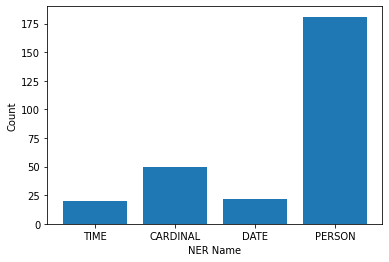

In [20]:
time = 0
cardinal = 0
date = 0
person = 0
EntityList= []

for i, sentence in enumerate(sentence_list): 
    for entity in sorted(entity_sentence_list[i]):
        # 將每項種類數量計算出來
        time = entity.count('TIME') + time
        cardinal = entity.count('CARDINAL') + cardinal
        date =  entity.count('DATE') + date
        person = entity.count('PERSON') + person
        EntityList.append(entity[3])

print('time: {}; cardinal:{}; date:{}; person:{}'.format(time,cardinal,date,person))
        
# 視覺化
x = ['TIME','CARDINAL','DATE','PERSON']            
y = [time, cardinal, date, person]
plt.xlabel('NER Name')
plt.ylabel('Count')
plt.bar(x,y)
plt.show()

In [11]:
# 計算各個實體各自出現的次數
def calculateTime(List):
    dic = {}
    count = 0
    word = ""
    NewList = []
    NewList2 = []
    for i in range(len(List)):
        word = List[i]
        for j in range(len(List)):
            if List[i] == List[j]:
                count += 1      
        # 取出次數超過10次的NER
        if count > 10:
            if NewList.count(str(count) + "個" + word) == 0:
                NewList.append(str(count) + "個" + word)
                dic[word] = count
        count = 0
        word = ""    
    return NewList, dic

In [12]:
# 查看詞頻統計
NewList, dic = calculateTime(EntityList)
print(NewList)

['50個德思禮', '32個一', '14個波特', '16個哈利', '23個鄧不利', '11個麥', '13個麥教授', '12個海格']


In [13]:
# # 文字雲無法import
# !pip install wordcloud
# from wordcloud import WordCloud

# # 將上述詞頻放入wordcloud畫圖
# # wordcloud的內建字體無法將中文顯示，需要指定電腦中的中文字體路徑，這邊使用微軟正黑體示範
# font = '/Users/Fonts/msjh.ttf' # 若是Windows電腦，參考路徑為："C:\Windows\Fonts\msjh.ttc"
# wordcloud = WordCloud(background_color = "white",font_path = font)
# wordcloud.generate_from_frequencies(dic) # 指定以word出現的頻率來畫大小

# # 設定大小，以及讓文字雲顯示
# plt.figure(figsize=(10,10))
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.show()

## 字詞統計(TF-IDF)

In [33]:
# 初始化
word_list = []
word_list2 = []
stopwords_list = [] 

# 斷詞好的資料
words_list = word_sentence_list

# 設定停用字
stop = open("stopwords.txt", encoding='utf-8').readlines() # 匯入停用字字典 
for i in range(len(stop)):
    stop[i] = stop[i].replace('\n','')
    stopwords_list.append(stop[i])

for j in range(len(words_list)):
    word_list = [] # 每篇開始前要先清空
    for i in words_list[j]:
        if i not in stopwords_list: # 排除停用字
            word_list.append(i)
            if word_list not in word_list2:
                word_list2.append(word_list) # 最終使用word_list2

In [55]:
# 計算tf
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()  
for i in word_list2:
    X = vectorizer.fit_transform(i)

tf = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
tf = tf.stack().reset_index() # 轉換dataframe格式
tf.columns = ['article','word','tf']
tf.head()

,article,word,tf
0,0,一塵不染,0
1,0,一點,0
2,0,不可能,0
3,0,事情,0
4,0,人們,0


#### Q: 使用課程內所提供的停止詞檔案，替第一章的內容除去停止詞，也請注意去除換行跟空白。請依照公式計算「哈利」、「德斯禮」和「麻瓜」三個字詞的tf值(字詞出現次數/該文本總字數)，取到小數點後五位
(0.00367, 0.01990, 0.00358)

In [61]:
tf.sort_values(by='tf',ascending=False)

,article,word,tf
461,9,天空,1
3810,76,大難,1
1938,38,知道,1
3620,72,悄聲,1
3442,68,聚會,1
...,...,...,...
1364,27,孩子,0
1365,27,寂靜,0
1366,27,小時,0
1367,27,尖叫聲,0


In [35]:
# 計算idf
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(sublinear_tf=False, smooth_idf=True, norm=None)  
for i in word_list2:
    X = vectorizer.fit_transform(i)

idf = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
idf = vectorizer.idf_
idf = pd.DataFrame([vectorizer.idf_], columns=vectorizer.get_feature_names())
idf = idf.stack().reset_index().iloc[:,[1,2]] # 轉換dataframe格式
idf.columns = ['word','idf']
idf.head()

,word,idf
0,一塵不染,4.713572
1,一點,4.713572
2,不可能,4.713572
3,事情,4.713572
4,人們,4.713572


In [36]:
# tf-idf
df = pd.merge(tf, idf, on='word', how='left') # 合併前面的結果
df['tf-idf'] = df['tf']*df['idf']
df.sort_values(by='tf-idf', ascending=False)

,article,word,tf,idf,tf-idf
461,9,天空,1,4.713572,4.713572
2517,50,尖叫聲,1,4.713572,4.713572
3620,72,悄聲,1,4.713572,4.713572
3442,68,聚會,1,4.713572,4.713572
205,4,兩旁,1,4.713572,4.713572
...,...,...,...,...,...
1364,27,孩子,0,4.713572,0.000000
1365,27,寂靜,0,4.713572,0.000000
1366,27,小時,0,4.713572,0.000000
1367,27,尖叫聲,0,4.713572,0.000000


In [37]:
from sklearn.feature_extraction.text import TfidfTransformer

# 透過sklearn計算tf-idf的score
transformer = TfidfTransformer(smooth_idf=True)
Z = transformer.fit_transform(X)

tfidf = pd.DataFrame(Z.toarray(),columns=vectorizer.get_feature_names())
tfidf = tfidf.stack().reset_index() # 轉換dataframe格式
tfidf.columns = ['article','word','score']
tfidf.sort_values(by='score', ascending=False)

,article,word,score
461,9,天空,1.0
3810,76,大難,1.0
1938,38,知道,1.0
3620,72,悄聲,1.0
3442,68,聚會,1.0
...,...,...,...
1364,27,孩子,0.0
1365,27,寂靜,0.0
1366,27,小時,0.0
1367,27,尖叫聲,0.0


## 情感分析

In [14]:
# 安裝情感分析套件
# !pip install snownlp

In [31]:
from snownlp import SnowNLP
from snownlp import sentiment
import pylab as pl

sentence = []
senti_score = []

for j in sentence_list:
    j = j.replace('\n','')
    s = SnowNLP(j)
    sentence.append(j)
    senti_score.append(round(s.sentiments,5))

table = pd.DataFrame({'sentence' : sentence,'score' : senti_score})
table = table.sort_values(by=['score'],ascending=False)
table.head()

,sentence,score
21,德思禮先生坐在扶手椅裡嚇呆了。英國普遍下流星雨……貓頭鷹光天化日之下四處紛飛……到處都是披著...,0.99931
69,「我是來接哈利，把他送到他阿姨姨丈家的。現在他們是他惟一的親人。」,0.99383
26,「哦，我是想……說不定……這跟……你知道……她那一群人有關係……」,0.98485
28,「我想是吧。」德思禮太太乾巴巴地說。,0.97396
11,「……沒錯，他們的兒子，哈利……」,0.93690


#### Q: 將空白與換行移出後(不移出停止詞)，做該文本各個句子的情感分析。請問該文本的平均分數為多少呢(取到小數點後五位)
0.17785

In [26]:
sum(table['score'])/len(table)

0.17017588235294112

#### 下列四句哪個情感分數最高?
a. 德思禮先生坐在扶手椅裡嚇呆了。英國普遍下流星雨……貓頭鷹光天化日之下四處紛飛……到處都是披著斗篷的怪人……還有一些傳聞，關於波特一家的傳聞……德思禮太太端著兩杯茶來到起居室。情況不妙。他應該向她透露一些。他心神不定，清了清嗓子，「唔……佩妮，親愛的……最近有你妹妹的消息嗎？」 
b. 第１章大難不死的男孩
c. 貓紋絲不動，只是狠狠地瞪了他一眼。這難道是一隻正常的貓的行為嗎？德思禮先生感到懷疑。他先讓自己鎮定下來，隨後就進屋去了。他仍決定對太太隻字不提。
d. 「對……對……對不起，」海格嗚咽地說，掏出一塊污漬斑斑的大手帕來，把臉埋在手帕裡，「我……我實在受……受不了……莉莉和詹姆死了……可憐的小哈利又要住在麻瓜們家裡……」

In [30]:
s1 = "德思禮先生坐在扶手椅裡嚇呆了。英國普遍下流星雨……貓頭鷹光天化日之下四處紛飛……到處都是披著斗篷的怪人……還有一些傳聞，關於波特一家的傳聞……德思禮太太端著兩杯茶來到起居室。情況不妙。他應該向她透露一些。他心神不定，清了清嗓子，「唔……佩妮，親愛的……最近有你妹妹的消息嗎？」 "
s2 = "第１章大難不死的男孩" 
s3 = "貓紋絲不動，只是狠狠地瞪了他一眼。這難道是一隻正常的貓的行為嗎？德思禮先生感到懷疑。他先讓自己鎮定下來，隨後就進屋去了。他仍決定對太太隻字不提。"
s4 = "「對……對……對不起，」海格嗚咽地說，掏出一塊污漬斑斑的大手帕來，把臉埋在手帕裡，「我……我實在受……受不了……莉莉和詹姆死了……可憐的小哈利又要住在麻瓜們家裡……」"

s_List = []
s_List.append(s1)
s_List.append(s2)
s_List.append(s3)
s_List.append(s4)
sen = []
score = []

for j in s_List:
    j = j.replace('\n','')
    s = SnowNLP(j)
    sen.append(j)
    score.append(round(s.sentiments,5))

for i in range(1,5):
    print("第{}句情緒分數: {}".format(i,score[i-1]))


第1句情緒分數: 0.99931
第2句情緒分數: 0.96035
第3句情緒分數: 0.00447
第4句情緒分數: 0.00586


### 使用長條圖視覺化情感分析分數
分數越接近1，越正面

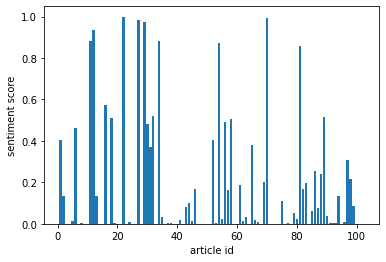

In [16]:
x = []
for i in range(1,103):
    x.append(i)
y = senti_score
plt.bar(x,y)
plt.ylabel('sentiment score')
plt.xlabel('article id')
plt.show()

In [32]:
# 印出情感分析出最正面的5句
top5 = table.head()['sentence']
for s in top5:
    print(s + '\n')

德思禮先生坐在扶手椅裡嚇呆了。英國普遍下流星雨……貓頭鷹光天化日之下四處紛飛……到處都是披著斗篷的怪人……還有一些傳聞，關於波特一家的傳聞……德思禮太太端著兩杯茶來到起居室。情況不妙。他應該向她透露一些。他心神不定，清了清嗓子，「唔……佩妮，親愛的……最近有你妹妹的消息嗎？」

「我是來接哈利，把他送到他阿姨姨丈家的。現在他們是他惟一的親人。」

「哦，我是想……說不定……這跟……你知道……她那一群人有關係……」

「我想是吧。」德思禮太太乾巴巴地說。

「……沒錯，他們的兒子，哈利……」



看不出哪裡正面欸?????

In [18]:
# 印出情感分析出最負面的5句
last5 = table.tail(5)['sentence']
for s in last5:
    print(s + '\n')

「一封信？」麥教授有氣無力地重複說，又坐回到牆頭上。「鄧不利多，您當真認為用一封信您就能把一切都解釋清楚嗎？這些人永遠也不會理解他的！他會成名的……一個傳奇人物……如果將來有一天把今天定為哈利波特日，我一點兒也不會覺得奇怪……會有許多寫哈利的書……我們世界裡的每一個孩子都會知道他的名字！」

德思禮先生在他九樓的辦公室裡，總是習慣背窗而坐。如果不是這樣，他可能會發現這一天早上他更難把思想集中到鑽機的事情上了。他沒有看見成群的貓頭鷹在光天化日之下從天上飛過，可街上的人群都看到了；他們目瞪口呆，指指點點，盯著貓頭鷹一隻接一隻從頭頂上掠過。他們大多甚至夜裡都從未見過貓頭鷹。德思禮先生這天早上很正常，沒有受到貓頭鷹的干擾。他先後對五個人大喊大叫了一遍，又打了幾個重要的電話，喊的聲音更響。他的情緒很好，到吃午飯的時候，他想舒展一下筋骨，到馬路對角的麵包房去買一塊小圓麵包。

「噢，泰德，」氣象播音員說，「這我可不知道，今天不僅是貓頭鷹表現反常。全國各地遠至肯特郡、約克郡、丹地1等地的目擊者都紛紛打來電話說，我們原來預報昨天有雨，結果下的不是雨而是流星！也許人們把本該在一星期後舉行的慶祝篝火之夜2晚會提前舉行了，朋友們！不過我向你們保證，今晚一定有雨。」

我們的故事開始於一個晦暗、陰沉的星期二，德思禮夫婦一早醒來，窗外濃雲低垂的天空並沒有絲毫跡象預示這地方即將發生神秘古怪的事情。德思禮先生哼著小曲，挑出一條最不喜歡的領帶戴著上班，德思禮太太高高興興，一直絮絮叨叨，把唧哇亂叫的達力塞到了兒童椅裡。

德思禮太太這一天過得很好，一切正常。晚飯桌上，德思禮太太向他講述了鄰居家的母女矛盾，還說達力又學會一個新詞(「絶不」)，德思禮先生也儘量表現得正常。安頓達力睡下之後，他來到起居室，聽到晚間新聞的最後一段報道：「最後，據各地鳥類觀察者反映，今天全國貓頭鷹表現反常。通常情況下，它們都是在夜間捕食，白天很少露面，可是今天，日出時貓頭鷹就四處紛飛。專家們也無法解釋貓頭鷹為什麼改變了它們的睡眠習慣。」新聞播音員說到這裡，咧嘴一笑，「真是太奇妙了。現在我把話筒交給吉姆麥古，問問他天氣情況如何。吉姆，今天夜裡還會下貓頭鷹雨嗎？」

